In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression().fit(X_train, y_train)
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


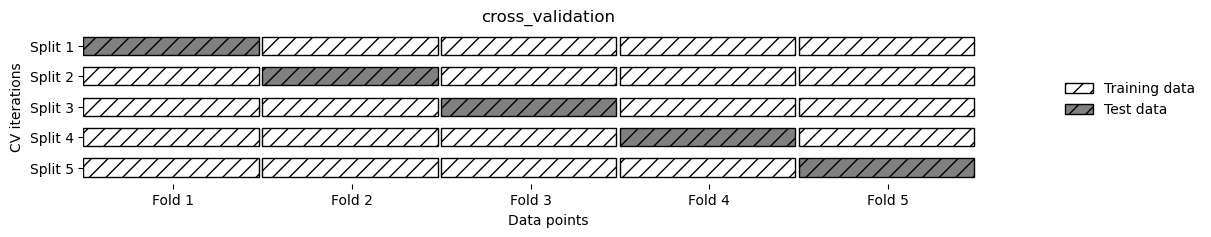

In [3]:
# 交差検証
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_cross_validation()
# 保存（例：PNG形式で保存）
plt.savefig("cross_validation_plot.png", dpi=300, bbox_inches='tight')

# オプション：画面にも表示したい場合
plt.show()

In [5]:
# scikit-learnでの交差検証
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv = 3) # cross_val_score(評価したいモデル, 訓練データ、正解ラベル, 分割数) default:5
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.98 0.96 0.98]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
scores = cross_val_score(logreg, iris.data, iris.target) # cross_val_score(評価したいモデル, 訓練データ、正解ラベル, 分割数) default:5
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.97


In [11]:
'''
交差検証の利点
訓練データとテストデータの割り当てを複数回行うため、モデルの精度が平均できる
一方で1回しか行わない場合に比べて、k倍時間がかかると言うデメリットもある。
'''

'\n交差検証の利点\n訓練データとテストデータの割り当てを複数回行うため、モデルの精度が平均できる\n一方で1回しか行わない場合に比べて、k倍時間がかかると言うデメリットもある。\n'

In [13]:
# 層化k分割交差検証と他の戦略
from sklearn.datasets import load_iris
iris = load_iris()   # k分割する方法が必ずしもうまくいかない例
print('Iris labels:\n{}'.format(iris.target))

# ３分割するとクラスが0のものがテスト用データに入るのでうまく予測できない

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


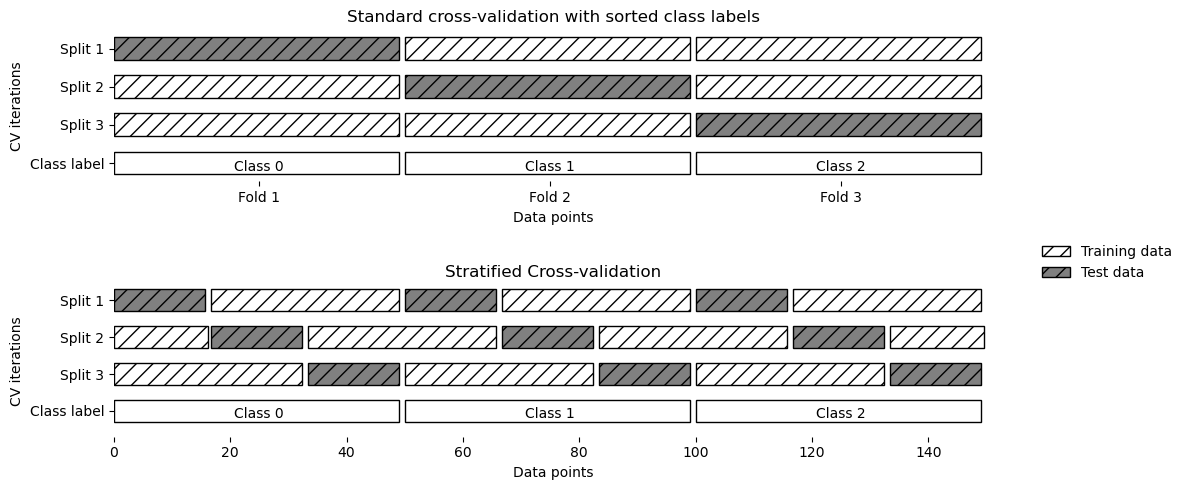

In [15]:
# クラス分類では層化k分割交差検証を行う
mglearn.plots.plot_stratified_cross_validation() # 各分割内でクラスの比率が全体の比率と同じになるように分割する

In [17]:
# 交差検証のより詳細な制御
# 層化３分割していない場合はクラス分けできない
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)
print('Cross-validation score:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

kfold = KFold(n_splits = 3)
print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

'''
kfoldを使う意味
シャッフルの有無や乱数シード（random_state）を指定できる
データの並びに依存せず、安定した評価が可能
乱数シードによって再現性が保証される
'''

Cross-validation score:
[1.         1.         0.86666667 0.93333333 0.83333333]
Cross-validation scores:
[0. 0. 0.]


'\nkfoldを使う意味\nシャッフルの有無や乱数シード（random_state）を指定できる\nデータの並びに依存せず、安定した評価が可能\n乱数シードによって再現性が保証される\n'

In [19]:
# データをシャッフルする
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [21]:
# leaveoneout　小さいデータセットには有効
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print('Number of cv iterations: ', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Number of cv iterations:  150
Mean accuracy: 0.97


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

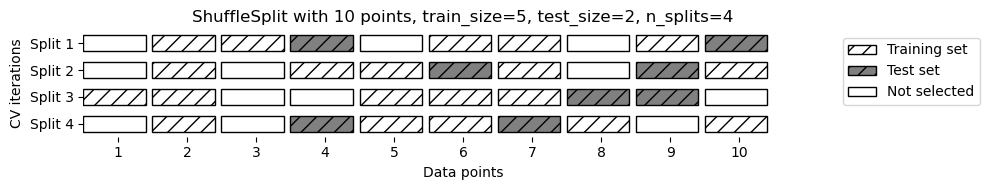

In [23]:
# シャッフル分割交差検証
mglearn.plots.plot_shuffle_split()

In [25]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = 0.5, train_size = 0.5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print('Cross-validatation scores:\n{}'.format(scores))

Cross-validatation scores:
[0.93333333 0.93333333 0.94666667 0.94666667 0.96       0.97333333
 0.97333333 0.94666667 0.97333333 0.97333333]


In [27]:
# グループ付き交差検証
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples = 12, random_state = 0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups = groups, cv = GroupKFold(n_splits = 3))
print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


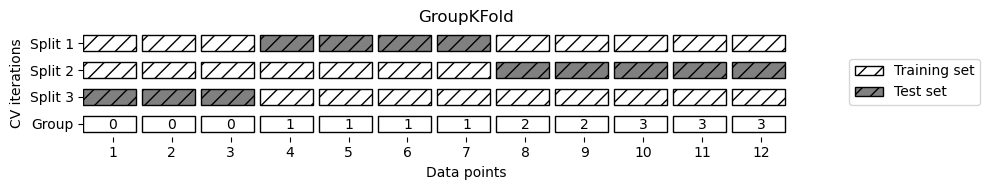

In [29]:
mglearn.plots.plot_group_kfold()

In [31]:
# グリッドサーチ
# 単純なグリッドサーチ
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print('Size of training set: {}   size of test set: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma': gamma}
print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [33]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
print('Size of training set: {}  size of validation set: {}  size of test set: {}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma': gamma}

# 訓練セットと検証セットを用いてモデルを再構築し、テストセットで評価
svm = SVC(**best_parameters)   # **は辞書をキーワード引数として展開する
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best score on validation set: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))
print('Test set score with best parameters: {:.2f}'.format(test_score))

Size of training set: 84  size of validation set: 28  size of test set: 38
Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [35]:
# 交差検証を用いたグリッドサーチ
import numpy as np
bast_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C = C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C' : C, 'gamma': gamma}
svm = SVC(**best_parameters)   # **は辞書をキーワード引数として展開する
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

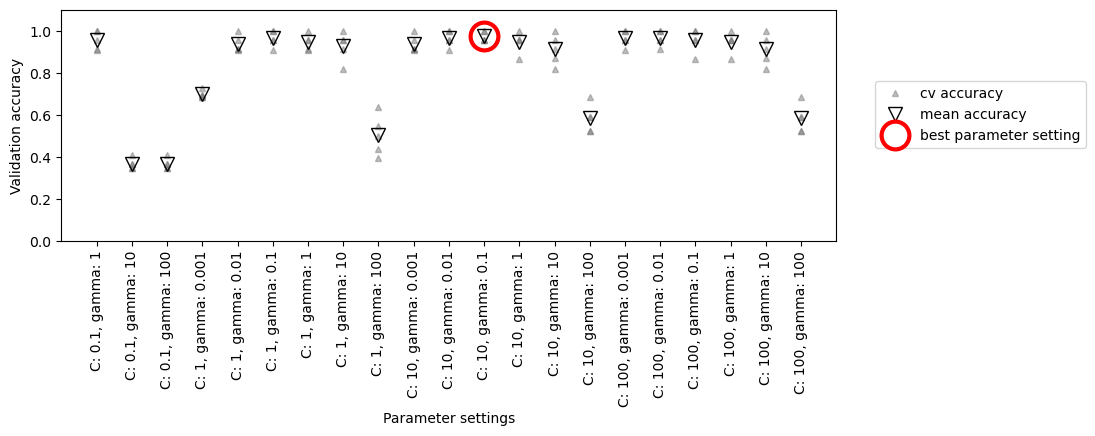

In [37]:
mglearn.plots.plot_cross_val_selection()

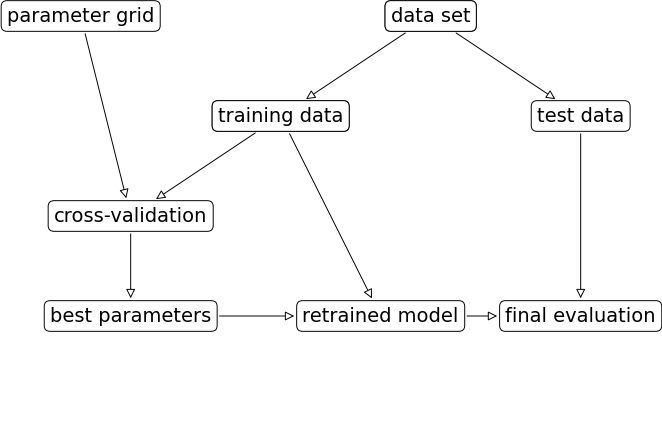

In [39]:
mglearn.plots.plot_grid_search_overview()

In [41]:
# 交差検証を用いたグリッドサーチをGridSearchCVで行う
param_grid = {'C' :[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}  # ディクショナリのキーをチューニングする関数の引数名と合わせる
print('Prameter grid:\n{}'.format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)  # (model, parameter, 分割数)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
grid_search.fit(X_train, y_train)
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))
print('Best parameter: {}'.format(grid_search.best_params_))  # 最適なパラメータをbest_params_で表示
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))  # 最も高い精度をbest_score_で表示
print('Best estimator:\n{}'.format(grid_search.best_estimator_)) #　見つけたモデルの確認

'''
流れ
パラメータを調整するためにディクショナリを作成(ディクショナリのキーをチューニングする関数の引数名と合わせる)
GridSearchCVを用いて最適なパラメータを決定(best_params_属性)  ＊ テストデータは使用していない
データを分割
訓練データの学習
訓練セットに対する交差検証の平均交差検証精度を確認
'''

Prameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score: 0.97
Best parameter: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97
Best estimator:
SVC(C=10, gamma=0.1)


'\n流れ\nパラメータを調整するためにディクショナリを作成(ディクショナリのキーをチューニングする関数の引数名と合わせる)\nGridSearchCVを用いて最適なパラメータを決定(best_params_属性)  ＊ テストデータは使用していない\nデータを分割\n訓練データの学習\n訓練セットに対する交差検証の平均交差検証精度を確認\n'

In [43]:
# 交差検証の結果の解析
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001512,0.000191,0.000924,0.000130,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000979,0.000333,0.000653,0.000186,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000641,0.000064,0.000468,0.000036,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000619,0.000101,0.000442,0.000043,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000794,0.000181,0.000550,0.000116,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


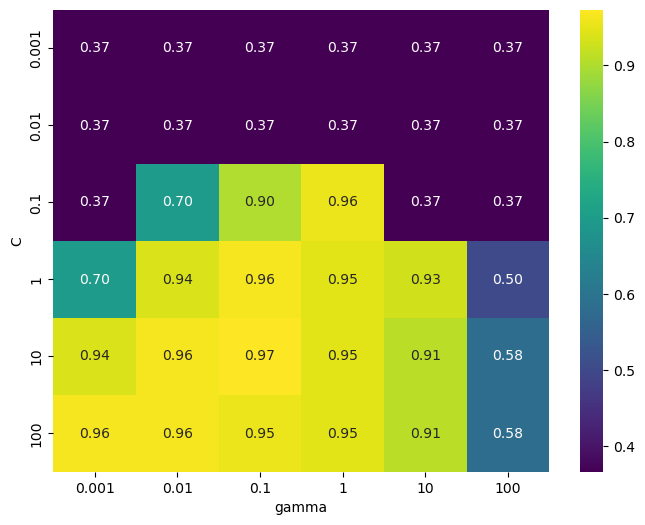

In [45]:
# 平均交差検証スコアのプロット
import seaborn as sns
import matplotlib.pyplot as plt

# スコア配列を作成
scores = np.array(results['mean_test_score']).reshape(6, 6)

# ヒートマップを描画
plt.figure(figsize=(8, 6))
sns.heatmap(scores, xticklabels = param_grid['gamma'], yticklabels = param_grid['C'],
    annot = True, fmt = ".2f", cmap = 'viridis') # annot = True 値を表示（小数3桁）
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()

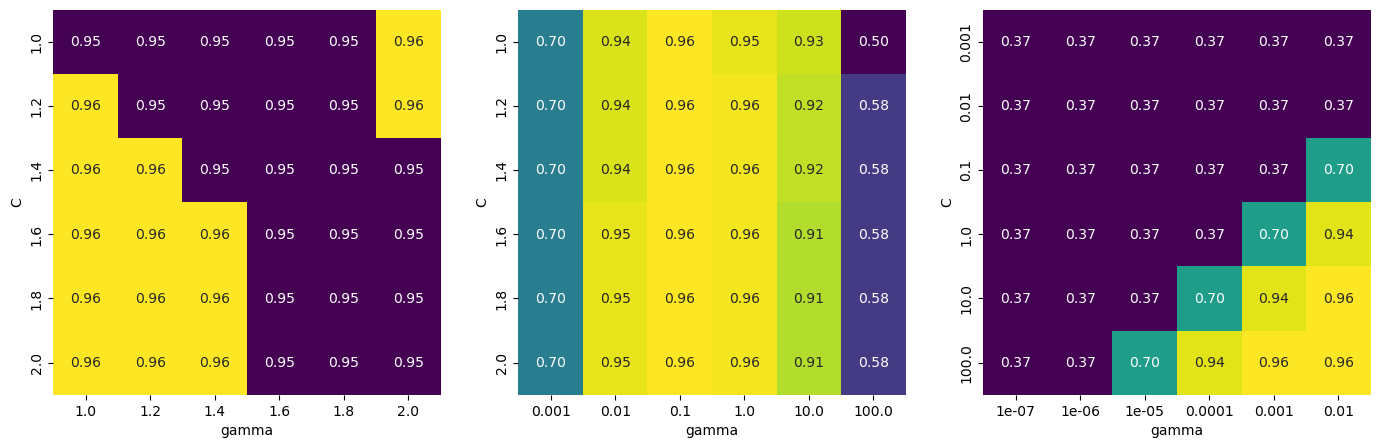

'\nsns.heatmap() の戻り値（scores_image）は matplotlib.axes._subplots.AxesSubplot\nplt.colorbar() に渡すべきなのは QuadMesh オブジェクト（ヒートマップの本体部分）\nsns.heatmap() が作成するヒートマップの実体（QuadMesh）は scores_image.collections[0] でアクセスできる\n'

In [47]:
fig, axes = plt.subplots(1, 3, figsize = (17, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image  = sns.heatmap(scores, xticklabels = param_grid['gamma'], yticklabels = param_grid['C'],
    annot = True, fmt = ".2f", cmap = 'viridis', cbar = False, ax = ax) # annot = True 値を表示（小数3桁）
    ax.set_xlabel("gamma")   # 個別のx軸ラベルを設定
    ax.set_ylabel("C")       # 個別のy軸ラベルを設定
plt.show()

'''
sns.heatmap() の戻り値（scores_image）は matplotlib.axes._subplots.AxesSubplot
plt.colorbar() に渡すべきなのは QuadMesh オブジェクト（ヒートマップの本体部分）
sns.heatmap() が作成するヒートマップの実体（QuadMesh）は scores_image.collections[0] でアクセスできる
'''

In [49]:
# グリッドでないサーチ空間
param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print('List of grids:\n{}'.format(param_grid))

#カーネルによって必要なパラメータが異なるため、カーネルごとに必要なパラメータを準備する

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [51]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_)) # 最適なパラメータの確認
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))  # 最適な検証スコアを確認

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [53]:
results = pd.DataFrame(grid_search.cv_results_)  # 詳細を確認
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001673,0.000881,0.00073,0.000551,0.000682,0.000546,0.000434,0.000485,0.000463,0.00051,...,0.000222,0.000274,0.000393,0.000407,0.0003,0.000266,0.000235,0.000224,0.000224,0.000231
std_fit_time,0.000159,0.000257,0.000154,0.00001,0.000078,0.00005,0.000006,0.000042,0.000022,0.000031,...,0.000004,0.000007,0.000007,0.000004,0.000012,0.000002,0.000001,0.000006,0.000007,0.000013
mean_score_time,0.001062,0.000664,0.000611,0.00041,0.000477,0.000379,0.000328,0.00038,0.000384,0.00037,...,0.000158,0.000178,0.000236,0.000245,0.00016,0.000154,0.000148,0.000144,0.000143,0.000143
std_score_time,0.000136,0.000161,0.000219,0.000003,0.000015,0.000021,0.000008,0.000027,0.000079,0.000019,...,0.000001,0.000003,0.000012,0.000005,0.000005,0.000002,0.000001,0.000001,0.000001,0.000001
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [55]:
# ネストした交差検証
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5), iris.data, iris.target, cv = 5)
print('Cross-validation scores: ', scores)
print('Mean cross-validation score: ', scores.mean())

'''
SVCはirisデータセットに対して交差検証精度の平均で98%を達成することができる
内側のcvはSVCを用いて最適なパラメータを探索
外側のcvで最適化したパラメータを用いたSVCのスコアを表示

ネストした交差検証を行う意味
・手法の妥当性比較ができる
・過学習していない客観的な精度がわかる
(通常の GridSearchCV.fit() の精度は、選定に使ったデータのスコアなので 過大評価されやすい。
ネストCVは、最終的な性能の見積もり（＝汎化性能）として信頼できる数値を出してくれる。)
'''

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


'\nSVCはirisデータセットに対して交差検証精度の平均で98%を達成することができる\n内側のcvはSVCを用いて最適なパラメータを探索\n外側のcvで最適化したパラメータを用いたSVCのスコアを表示\n\nネストした交差検証を行う意味\n・手法の妥当性比較ができる\n・過学習していない客観的な精度がわかる\n(通常の GridSearchCV.fit() の精度は、選定に使ったデータのスコアなので 過大評価されやすい。\nネストCVは、最終的な性能の見積もり（＝汎化性能）として信頼できる数値を出してくれる。)\n'

In [57]:
# 評価基準とスコア
# 2クラス分類における基準
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9  # 9以外のクラスはFalseになる(大部分) 
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [59]:
# 常に9以外を予測する
from sklearn.dummy import DummyClassifier  # 単純な分類モデル
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train) # most_frequent: 訓練データで最も多く出現したクラスだけを常に予測する
pred_most_frequent = dummy_majority.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [61]:
# 決定木による予測
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))
# tree.score(X_test, y_test)は、内部的にpredict()を呼び出してaccuracy_scoreを計算

'''
精度は単純な分類モデルであるDummyClassifierとあまり変わらない
'''

Test score: 0.92


'\n精度は単純な分類モデルであるDummyClassifierとあまり変わらない\n'

In [63]:
# 他のクラス分類器による予測
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)  # ランダムな出力を行う
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

'''
ランダムな出力を行うクラス分類器でも0.90になっているので偏ったデータに対する予測性能を定量化する基準として、精度は不適切だということがわかる
'''

dummy score: 0.90
logreg score: 0.98


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\nランダムな出力を行うクラス分類器でも0.90になっているので偏ったデータに対する予測性能を定量化する基準として、精度は不適切だということがわかる\n'

In [65]:
# 混同行列　２クラス分類の評価結果を表現する方法
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


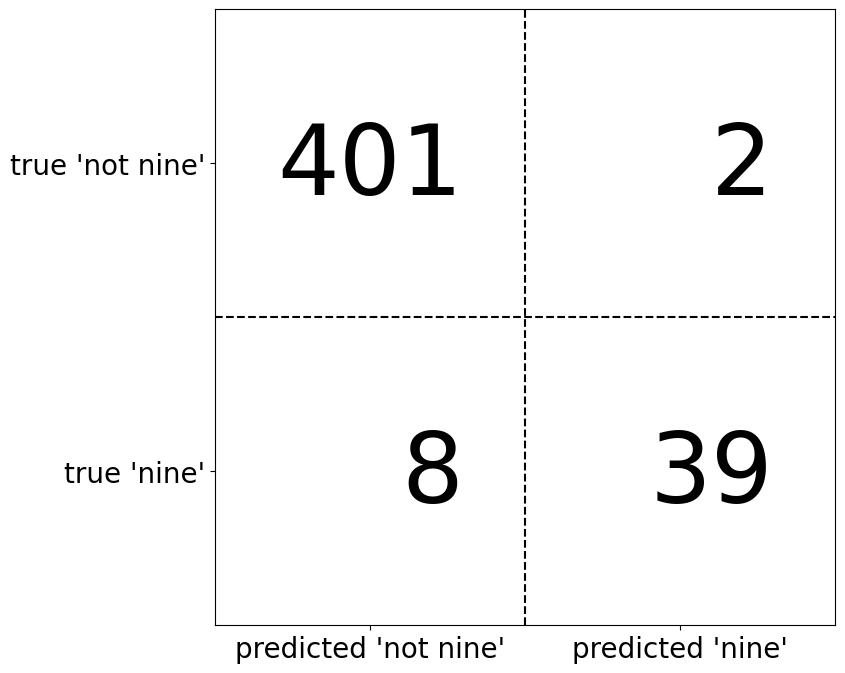

In [67]:
mglearn.plots.plot_confusion_matrix_illustration()

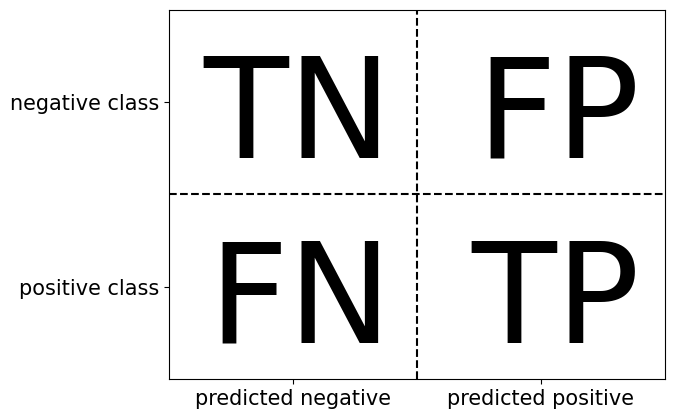

In [69]:
mglearn.plots.plot_binary_confusion_matrix()    
# TN(true negative:真陰性)、FN(false negative:偽陰性)、FP(false positive:偽陽性)、TP(true positive:真陽性)

In [71]:
# 上記の分類結果を混同行列で表現
print('Most frequent class:')
print(confusion_matrix(y_test, pred_most_frequent))

print('\nDummy model:')
print(confusion_matrix(y_test, pred_dummy))

print('\nDecision tree:')
print(confusion_matrix(y_test, pred_tree))

print('\nLogistic Regression:')
print(confusion_matrix(y_test, pred_logreg))

'''
精度の観点では上記のモデルに大きな違いはなかったが、混同行列を確認することで決定木とロジスティック回帰がまともな結果を表示していることが分かる
特にロジスティック回帰は偽陽性(6)、偽陰性(1)の数が4つの中で一番少ない
'''

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[402   1]
 [  6  41]]


'\n精度の観点では上記のモデルに大きな違いはなかったが、混同行列を確認することで決定木とロジスティック回帰がまともな結果を表示していることが分かる\n特にロジスティック回帰は偽陽性(6)、偽陰性(1)の数が4つの中で一番少ない\n'

In [73]:
from sklearn.metrics import f1_score
print('f1 score most frequent: {:.2f}'.format(f1_score(y_test, pred_most_frequent))) # 陽性クラスと予測されるサンプルがないため、0になる
print('f1 score dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

'''
ダミー2つと決定木の結果が判別できている
'''

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


'\nダミー2つと決定木の結果が判別できている\n'

In [75]:
# 混合行列の結果をまとめた
# 適合率(precision)、再現率(recall)、f値、支持度(support)をまとめた包括的なレポートの作成
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred_most_frequent, target_names = ['not nine', 'nine']))

'''
適合度 = 真陽性 / (真陽性　＋　偽陽性)   偽陽性の数を制限したい時に使用する基準
再現度 = 真陽性 / (真陽性　＋　偽陰性)　　偽陰性の数を制限したい時に使用する基準
f値 = (2 × 適合率 × 再現率) / (適合率 + 再現率)　　適合度と再現度の双方を取り入れている
支持度　クラスのサンプル数
'''

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'\n適合度 = 真陽性 / (真陽性\u3000＋\u3000偽陽性)   偽陽性の数を制限したい時に使用する基準\n再現度 = 真陽性 / (真陽性\u3000＋\u3000偽陰性)\u3000\u3000偽陰性の数を制限したい時に使用する基準\nf値 = (2 × 適合率 × 再現率) / (適合率 + 再現率)\u3000\u3000適合度と再現度の双方を取り入れている\n支持度\u3000クラスのサンプル数\n'

In [77]:
print(classification_report(y_test, pred_dummy, target_names = ['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
print(classification_report(y_test, pred_tree, target_names = ['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [81]:
print(classification_report(y_test, pred_logreg, target_names = ['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [83]:
# 不確実性を考慮に入れる
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples = (400, 50), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = 0.05).fit(X_train, y_train)

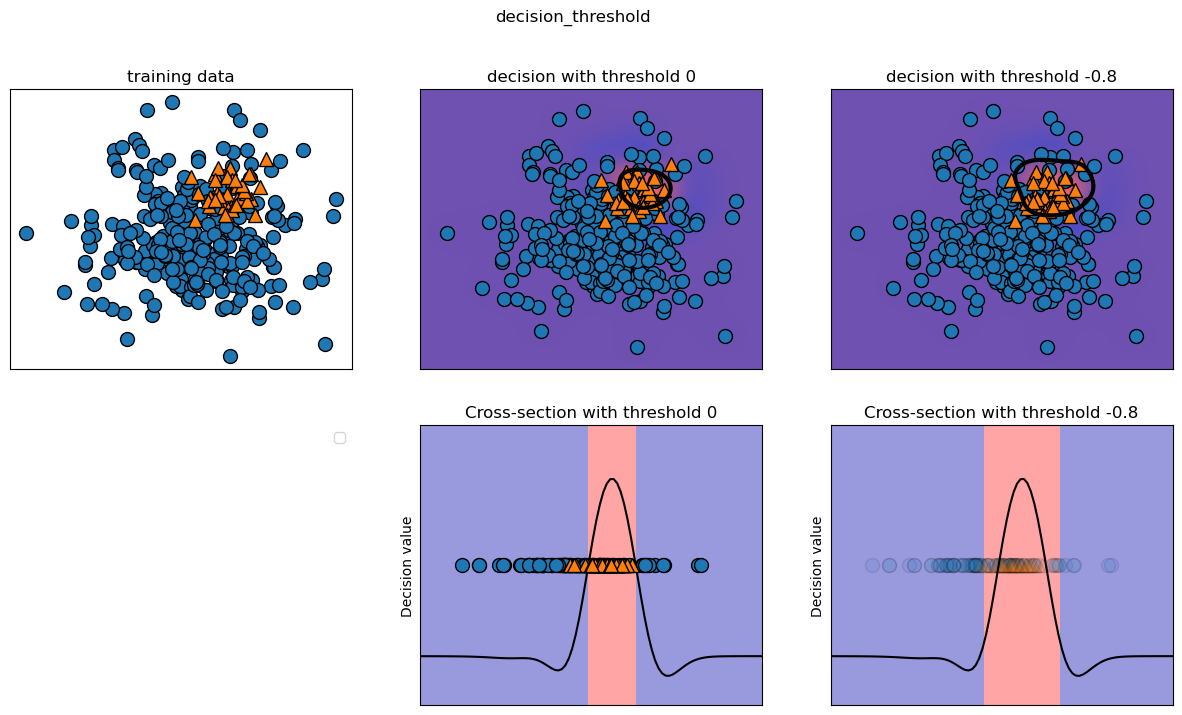

In [85]:
mglearn.plots.plot_decision_threshold()

'''
decision_function 境界線からの距離
predict_proba  クラスに属する確率
'''

In [87]:
print(classification_report(y_test, svc.predict(X_test)))

'''
クラス1に関して、再現率は低く、適合率も微妙
'''

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



'\nクラス1に関して、再現率は低く、適合率も微妙\n'

In [89]:
# defaultでは0になっているので値を小さくする
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_lower_threshold))
'''
適合度 = 真陽性 / (真陽性　＋　偽陽性)   偽陽性の数を制限したい時に使用する基準
再現度 = 真陽性 / (真陽性　＋　偽陰性)　　偽陰性の数を制限したい時に使用する基準
f値 = (2 × 適合率 × 再現率) / (適合率 + 再現率)　　適合度と再現度の双方を取り入れている
支持度　クラスのサンプル数

<----- 負のクラス ----|---- 正のクラス ----->
       -2     -1     0     +1     +2
       ↑            ↑             ↑
  decision = -2.3   境界     decision = +2.5

'''

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



'\n適合度 = 真陽性 / (真陽性\u3000＋\u3000偽陽性)   偽陽性の数を制限したい時に使用する基準\n再現度 = 真陽性 / (真陽性\u3000＋\u3000偽陰性)\u3000\u3000偽陰性の数を制限したい時に使用する基準\nf値 = (2 × 適合率 × 再現率) / (適合率 + 再現率)\u3000\u3000適合度と再現度の双方を取り入れている\n支持度\u3000クラスのサンプル数\n'

In [93]:
# 適合率-再現率カーブ
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test)) # 引数: 真のラベルと陽性クラスに属する確率または距離

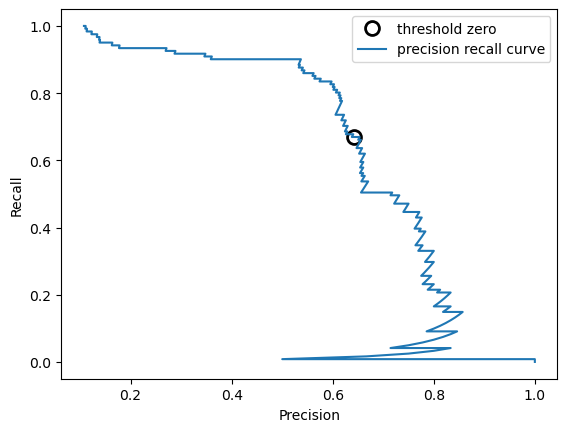

In [97]:
# カーブが滑らかになるようにデータポイントを増やす
X, y = make_blobs(n_samples = (4000, 500), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = 0.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# ゼロに最も近いスレッショルドを探す
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = 'threshold zero', fillstyle = 'none', c = 'k', mew = 2)
plt.plot(precision, recall, label = 'precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc = 'best')

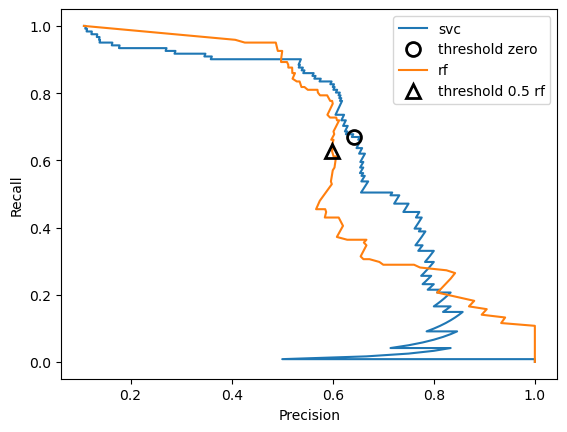

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)

# RandomForestClassifierにはpredict_probaはあるが、decision_functionはない
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label = 'svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize = 10, label = 'threshold zero', fillstyle = 'none', c = 'k', mew = 2)

plt.plot(precision_rf, recall_rf, label = 'rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize = 10, label = 'threshold 0.5 rf', fillstyle = 'none', c = 'k', mew = 2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc = 'best')

In [101]:
print('f1_score of random forest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [105]:
# カーブ下の領域を積分することで適合率-再現率カーブを要約する
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.659
Average precision of svc: 0.666


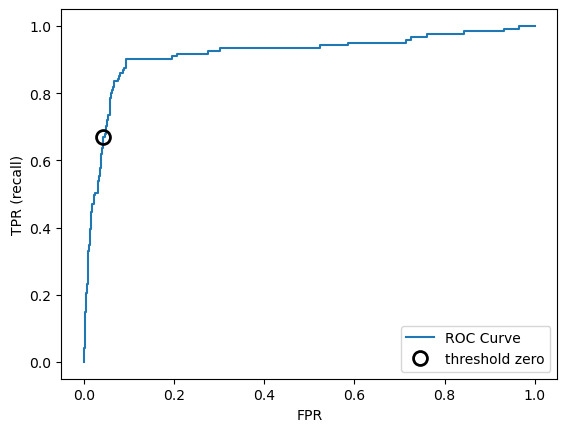

In [107]:
# 受信者動作特性(ROC)とAUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
# 0に最も近いスレッショルドを見つける
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = 'threshold zero', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

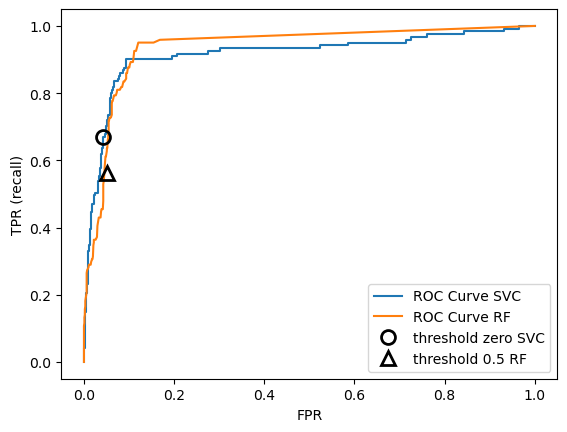

In [109]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1]) 
plt.plot(fpr, tpr, label = 'ROC Curve SVC')
plt.plot(fpr_rf, tpr_rf, label = 'ROC Curve RF')

plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = 'threshold zero SVC', fillstyle = 'none', c = 'k', mew = 2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize = 10, label = 'threshold 0.5 RF', fillstyle = 'none', c = 'k', mew = 2)
plt.legend(loc = 4)

In [113]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


In [117]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


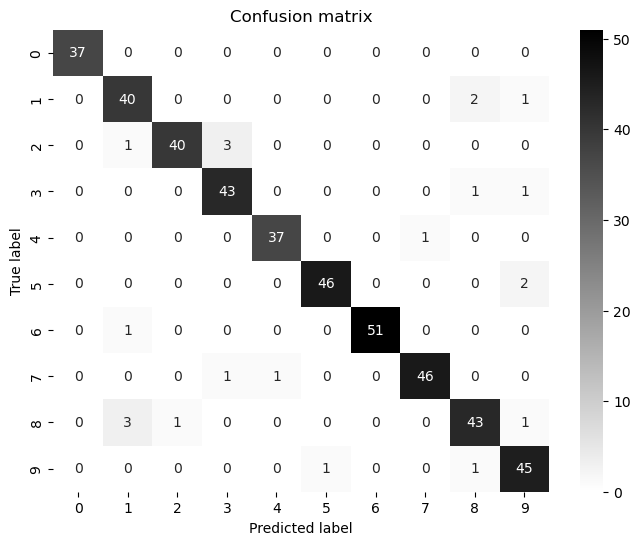

In [133]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# ヒートマップの描画
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd', cmap = plt.cm.gray_r,
            xticklabels = digits.target_names, yticklabels = digits.target_names) # annot:セルに文字を記入
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [135]:
print(classification_report(y_test, pred))

'''
個々のサンプルを同じように重視するなら,micro平均のf1値を使う
個々のクラスを同じように重視するなら, macro平均のf1値を使う
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [139]:
# 回帰の基準
# 評価基準を用いたモデル選択
print('Default scoring: {}'.format(cross_val_score(SVC(), digits.data, digits.target == 9, cv = 3))) # dafaultの分類スコアは精度
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = 'accuracy', cv = 3)  # scoring = 'accuracy'としても結果は変わらない
print('Explicit accuracy scoring: {}'.format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = 'roc_auc', cv = 3) # AUCスコアに設定
print('AUC scoring: {}'.format(roc_auc))

Default scoring: [0.97996661 0.98664441 0.98330551]
Explicit accuracy scoring: [0.97996661 0.98664441 0.98330551]
AUC scoring: [0.99557823 0.99879406 0.98964131]


In [141]:
# 精度を用いたグリッドサーチ
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state = 0)
param_grid = {'gamma' : [0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid = param_grid)
grid.fit(X_train, y_train)
print('Grid-Search with accuracy')
print('Best parameters:', grid.best_params_)
print('Best cross-validation score (accuracy): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))  # テストセットのAUC
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [145]:
# AUCを用いたグリッドサーチ
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring = 'roc_auc')
grid.fit(X_train, y_train)
print('Grid-Search with AUC')
print('Best parameters:', grid.best_params_)
print('Best cross-validation score (AUC): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(grid.score(X_test, y_test)))

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
